# Demo: explainable AI for tree based models with SHAP
## Steps: 
1) Load your data, build and fit your model
2) Explain your model

## Step 1: load your data, build and fit your model
### The code below is just an example using fake data. Replace the code below by your own data and model.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

np.random.seed(123)  # For reproducibility
n_samples = 1000  # Number of samples
n_features = 100  # Number of predictors

# Generate random features (predictors) and make some fake interactions
X = np.random.rand(n_samples, n_features)
X[:,10] = X[:,1]*X[:,9]
X[:,2] = X[:,5]+X[:,4]
X[:,6] = X[:,5]-X[:,7]
X[:,8] = X[:,5]-X[:,3]
X[:,11] = X[:,1]+X[:,5]
X[:,13] = X[:,10]+X[:,5]

y = (np.sum(X[:, 0:15], axis=1)*(X[:,13]+X[:,11] ) > 7).astype(int)  # Sum of first 10 features determines the class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)

#replace this by the feature labels you have
feature_labels = ["feature "+str(i) for i in range(n_features)]

## Step 2: Explain your model

/blue/raquel.dias/share/conda/envs/TF216_Keras_Shap/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2
shape1 (300, 100)
shape2 (100,)


/blue/raquel.dias/share/conda/envs/TF216_Keras_Shap/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/blue/raquel.dias/share/conda/envs/TF216_Keras_Shap/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


(300, 100) <class 'numpy.ndarray'>


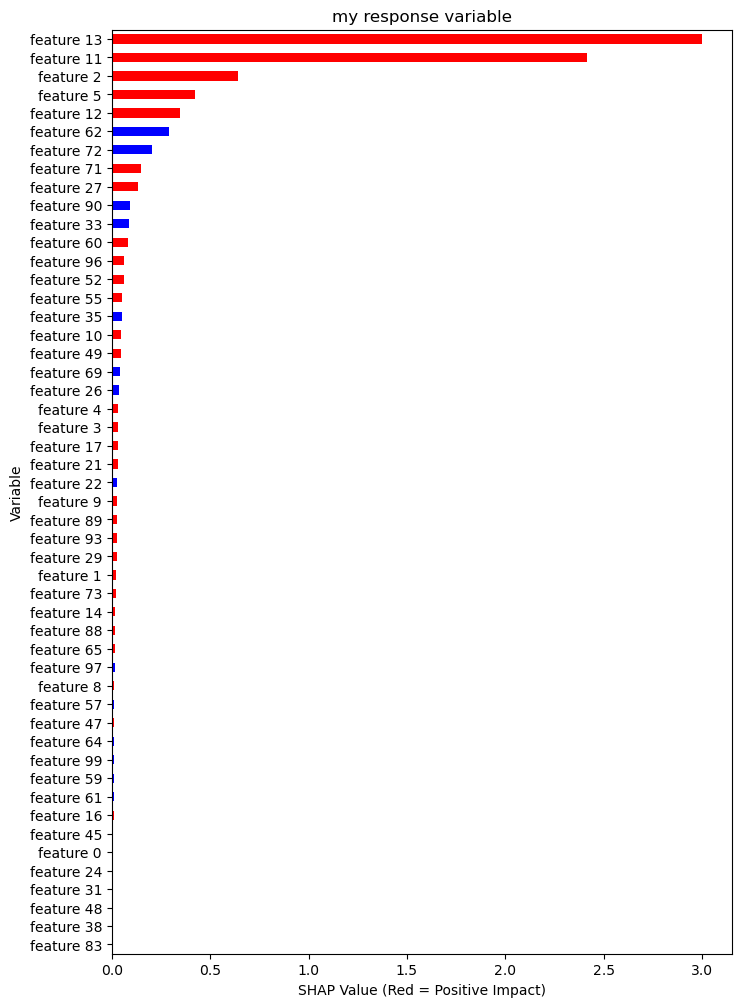

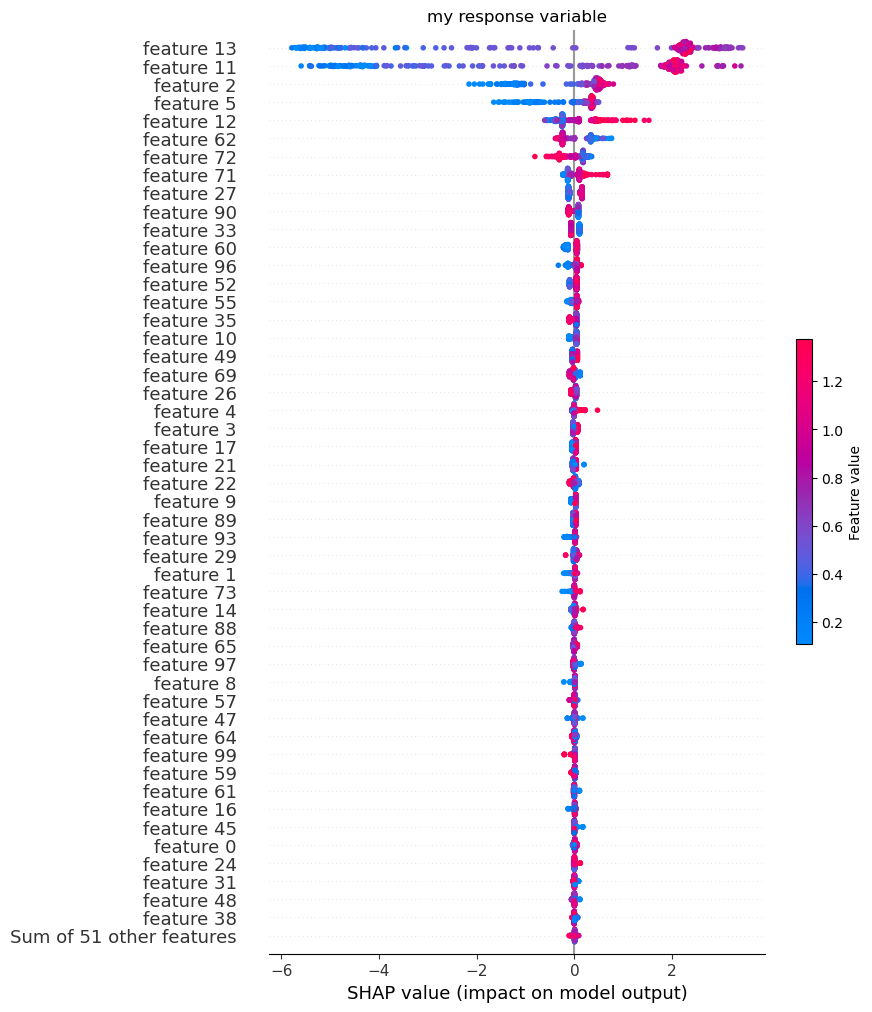

max 5.0744905 min -5.142472 shape (300, 100, 100)
(300, 100, 100)


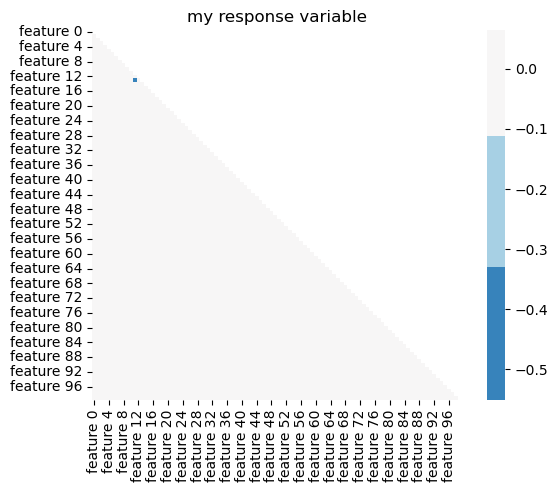

/blue/raquel.dias/raquel.dias/ABIS/shap_ultils.py:168: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.color[df.weight < 0] = "blue"
/blue/raquel.dias/raquel.dias/ABIS/shap_ultils.py:168: SettingWithCopyWarning: 
A value is trying to be set

0.0 0.0
head       source     target    weight  color
1  feature 0  feature 1  0.000000  black
2  feature 0  feature 2  0.000032    red
3  feature 0  feature 3  0.000000  black
4  feature 0  feature 4  0.000000  black
5  feature 0  feature 5  0.000000  black
4943 edges removed, remaining: 7
            weight
count  4950.000000
mean     -0.000113
std       0.007922
min      -0.550748
25%       0.000000
50%       0.000000
75%       0.000000
max       0.064145


<Figure size 640x480 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

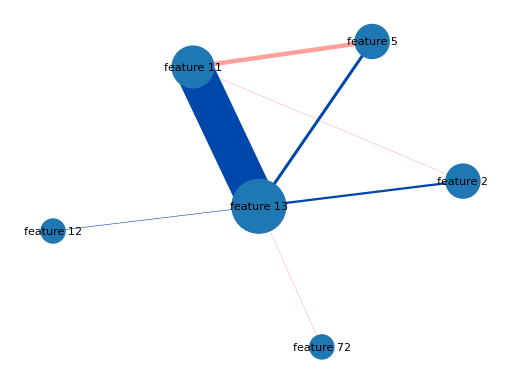

<Figure size 700x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [2]:
from shap_ultils import get_shap, get_shap_interactions
my_explainer = get_shap(model, X_test, feature_labels, "my response variable", "my example plot title")
interaction_df = get_shap_interactions(model, X_test, feature_labels, "my response variable", "my example plot title", cor_threshold=0.005)